In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth \
      -O checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2022-01-16 23:05:29--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 147.139.17.71
Connecting to download.openmmlab.com (download.openmmlab.com)|147.139.17.71|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.



In [3]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

load checkpoint from local path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


In [4]:
# Use the detector to do inference
img = 'demo/kin_image.png'
result = inference_detector(model, img)

/home/aditya/robotics/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [5]:
# length of the arrays inside the result tuple is 80 
print(result[0][20])
not_none = 0
object_arrays = list()
object_masks = list()
for i, val in enumerate(result[0]):
    if len(val) != 0:
        not_none += 1
        object_arrays.append(val)
        object_masks.append(result[1][i])
    print(i, val)
print(f'Arrays that don\'t have zero length are : {not_none}')
# print(object_arrays)

first_objects = list()
# print all the non-empty object arrays
first_masks = list()
for i, object_array in enumerate(object_arrays):
    print(i, object_array)
    first_objects.append(object_array[0])
    first_masks.append(object_masks[i][0])
    
for i, first_object in enumerate(first_objects):
    print(i, first_object)
    
for i, first_mask in enumerate(first_masks):
    print(i, first_mask)
    
import numpy as np
# print(np.asarray(first_objects[0].shape))
print(np.asarray(first_masks[0].shape))

random_mask = first_masks[1]
print(len(random_mask[0]), len(random_mask))
# random_m = [[not random_mask[i][j] for j in len(random_mask[0])] for i in len(random_mask)]
random_mask = ~random_mask
# random_mask = not random_mask
image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
image[random_mask] = 0
# rgb_converted = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

sample_bb = first_objects[1]
# extract the bounding box of the image
cropped_image = image[int(sample_bb[1]):int(sample_bb[3]), int(sample_bb[0]):int(sample_bb[2])]

plt.figure()
plt.imshow(cropped_image)

[]
0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 [[6.9436530e+02 4.7940848e+02 8.6283295e+02 5.9607056e+02 7.9599291e-01]
 [5.0031512e+02 3.7010028e+02 6.3710364e+02 4.5097855e+02 3.5775402e-01]]
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 []
38 []
39 []
40 []
41 []
42 []
43 []
44 []
45 [[5.0110745e+02 3.6866879e+02 6.3495190e+02 4.5420758e+02 6.6256469e-01]
 [6.9475909e+02 4.7742230e+02 8.6225006e+02 5.9617670e+02 6.6003138e-01]
 [8.7116650e+02 3.8144543e+02 1.0487815e+03 5.0133981e+02 1.9019486e-01]]
46 []
47 [[8.89873657e+02 3.86764832e+02 9.34848938e+02 4.36845551e+02
  7.66677260e-01]
 [9.09537048e+02 4.39646729e+02 9.50190186e+02 4.62562805e+02
  4.19549853e-01]
 [9.25332703e+02 3.98068695e+02 9.87709473e+02 4.49971466e+02
  2.98195392e-01]
 [9.52596375e+02 4.40265747e+02 1.00012915e+03 4.61733337e+02
  1.57149121e-01]
 [8.99020630e+02 4.17664246e+02 9.2709790

NameError: name 'cv2' is not defined

In [6]:
# method for computing the intersection over union (IOU) for two bounding boxes
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou


In [85]:
# compute the iou between two objects - first_objects[6] and first_objects[7]
bb1_index, bb2_index = 3, 4
bb1 = {'x1': int(first_objects[bb1_index][0]), 
       'x2': int(first_objects[bb1_index][2]), 
       'y1': int(first_objects[bb1_index][1]), 
       'y2': int(first_objects[bb1_index][3])}

bb2 = {'x1': int(first_objects[bb2_index][0]), 
       'x2': int(first_objects[bb2_index][2]), 
       'y1': int(first_objects[bb2_index][1]), 
       'y2': int(first_objects[bb2_index][3])}

# compute the iou between the two bbs 
iou = get_iou(bb1, bb2)
print(f'The iou between the two objects is : {iou}')

# compute the iou between two bounding boxes and remove the one with the lesser confidence 
for bb1_index in range(len(first_objects)):
    for bb2_index in range(bb1_index+1, len(first_objects)):
        # check if either of the bounding boxes are of type None
#         if first_objects[bb1_index] == None or first_objects[bb2_index] == None:
#             continue
        if first_objects[bb1_index] is None or first_objects[bb2_index] is None:
            continue
        # compute the iou between the two bounding boxes 
        bb1 = {'x1': int(first_objects[bb1_index][0]), 
       'x2': int(first_objects[bb1_index][2]), 
       'y1': int(first_objects[bb1_index][1]), 
       'y2': int(first_objects[bb1_index][3])}

        bb2 = {'x1': int(first_objects[bb2_index][0]), 
       'x2': int(first_objects[bb2_index][2]), 
       'y1': int(first_objects[bb2_index][1]), 
       'y2': int(first_objects[bb2_index][3])}
        
        iou = get_iou(bb1, bb2)
        if iou>=0.5:
            # remove the list item with the lower threshold 
            bounding_box1 = first_objects[bb1_index]
            bounding_box2 = first_objects[bb2_index]
            print(f'The indices are : {bb1_index}, {bb2_index}')
            # find the one with the lower score 
            print(bounding_box1)
            print(first_objects)
            if bounding_box1[4] < bounding_box2[4]:
                # set the bounding_box1 to None
                first_objects[bb1_index] = None
            else:
                # set the bounding_box2 to None
                # first_objects[first_objects.index(bounding_box2)] = None
                first_objects[bb2_index] = None
                
            print(first_objects)

The iou between the two objects is : 0.9811320754716981
The indices are : 3, 4
[9.2368311e+02 3.9896826e+02 9.8874390e+02 4.5071405e+02 7.8708303e-01]
[array([6.9436530e+02, 4.7940848e+02, 8.6283295e+02, 5.9607056e+02,
       7.9599291e-01], dtype=float32), array([501.10745  , 368.6688   , 634.9519   , 454.20758  ,   0.6625647],
      dtype=float32), array([8.8987366e+02, 3.8676483e+02, 9.3484894e+02, 4.3684555e+02,
       7.6667726e-01], dtype=float32), array([9.2368311e+02, 3.9896826e+02, 9.8874390e+02, 4.5071405e+02,
       7.8708303e-01], dtype=float32), array([9.2365588e+02, 3.9815396e+02, 9.8827374e+02, 4.5138760e+02,
       1.4500555e-01], dtype=float32), array([9.5258057e+02, 4.4015143e+02, 1.0048457e+03, 4.6175998e+02,
       3.6661828e-01], dtype=float32), array([5.3134180e+02, 3.1164551e-01, 7.3005182e+02, 3.2628781e+02,
       7.9957306e-01], dtype=float32), array([5.4001227e+02, 2.2571442e+01, 7.2888324e+02, 3.2675363e+02,
       1.6166475e-01], dtype=float32), array([5.43

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 []
14 []
15 []
16 []
17 []
18 []
19 []
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 [[6.9436530e+02 4.7940848e+02 8.6283295e+02 5.9607056e+02 7.9599291e-01]
 [5.0031512e+02 3.7010028e+02 6.3710364e+02 4.5097855e+02 3.5775402e-01]]
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 []
38 []
39 []
40 []
41 []
42 []
43 []
44 []
45 [[5.0110745e+02 3.6866879e+02 6.3495190e+02 4.5420758e+02 6.6256469e-01]
 [6.9475909e+02 4.7742230e+02 8.6225006e+02 5.9617670e+02 6.6003138e-01]
 [8.7116650e+02 3.8144543e+02 1.0487815e+03 5.0133981e+02 1.9019486e-01]]
46 []
47 [[8.89873657e+02 3.86764832e+02 9.34848938e+02 4.36845551e+02
  7.66677260e-01]
 [9.09537048e+02 4.39646729e+02 9.50190186e+02 4.62562805e+02
  4.19549853e-01]
 [9.25332703e+02 3.98068695e+02 9.87709473e+02 4.49971466e+02
  2.98195392e-01]
 [9.52596375e+02 4.40265747e+02 1.00012915e+03 4.61733337e+02
  1.57149121e-01]
 [8.99020630e+02 4.17664246e+02 9.27097900e+

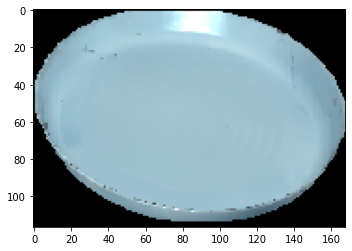

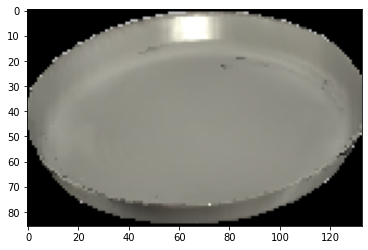

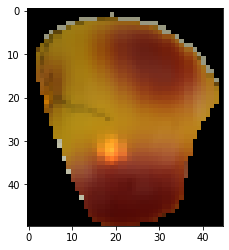

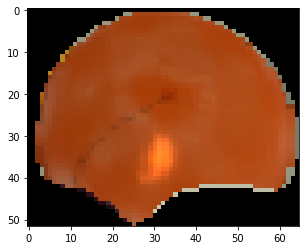

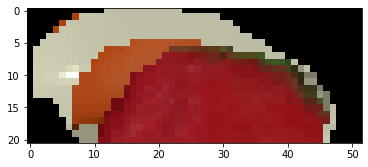

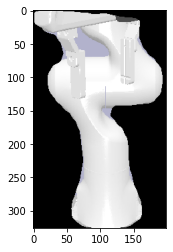

In [9]:
# Full code logic 
# Use the full object arrays and masks to generate the object segmentations 
# Extract the object bounding boxes and the corresponding masks 
# For two bounding boxes, check if the iou between them is greater than threshold, reject bb with lower score
# Generate the mask over the remaining bounding boxes
# Use the generated image segments for performing feature matching with the target mesh objects 
# This can be used for grasp verification as well as for object matching (replacing SuperGlue)
# Generate features using multiple networks (model ensembling) and combine their features 

import cv2
import matplotlib.pyplot as plt

img = 'demo/kin_image.png'
result = inference_detector(model, img)

# Extract the full object arrays and masks 
not_none = 0
object_arrays = list()
object_masks = list()
for i, val in enumerate(result[0]):
    if len(val) != 0:
        not_none += 1
        object_arrays.append(val)
        object_masks.append(result[1][i])
    print(i, val)
print(f'Arrays that don\'t have zero length are : {not_none}')

first_objects = list()
first_masks = list()
for i, object_array in enumerate(object_arrays):
    print(i, object_array)
    first_objects.append(object_array[0])
    first_masks.append(object_masks[i][0])

# # Printing the extracted objects
# for i, first_object in enumerate(first_objects):
#     print(i, first_object)
    
# # Pring the extracted masks
# for i, first_mask in enumerate(first_masks):
#     print(i, first_mask)
    
# Compute the iou between two bounding boxes and remove the one with the lower confidence 
for bb1_index in range(len(first_objects)):
    for bb2_index in range(bb1_index+1, len(first_objects)):
        if first_objects[bb1_index] is None or first_objects[bb2_index] is None:
            continue

        bb1 = {'x1': int(first_objects[bb1_index][0]), 
       'x2': int(first_objects[bb1_index][2]), 
       'y1': int(first_objects[bb1_index][1]), 
       'y2': int(first_objects[bb1_index][3])}

        bb2 = {'x1': int(first_objects[bb2_index][0]), 
       'x2': int(first_objects[bb2_index][2]), 
       'y1': int(first_objects[bb2_index][1]), 
       'y2': int(first_objects[bb2_index][3])}
        
        iou = get_iou(bb1, bb2)
        if iou>=0.5:
            # set the bb with the lower confidence to None
            bounding_box1 = first_objects[bb1_index]
            bounding_box2 = first_objects[bb2_index]
            # print(f'The indices are : {bb1_index}, {bb2_index}')
            
            if bounding_box1[4] < bounding_box2[4]:
                first_objects[bb1_index] = None
                first_masks[bb1_index] = None
            else:
                first_objects[bb2_index] = None
                first_masks[bb2_index] = None

# Purge all bbs that are None
updated_bbs = [bb for bb in first_objects if bb is not None]
updated_masks = [mask for mask in first_masks if mask is not None]
print(len(updated_bbs), len(updated_masks))
print(updated_masks)

import random, os

save_dir_name = 'saved_segments'
os.makedirs(save_dir_name, exist_ok=True)

# function to generate a 5 digit random alphanumeric number
def get_random(CHAR_LEN=5):
    chars = 'abcdefghijklmnopqrstuvwxyz0123456789'
    random_chars = list()
    for i in range(CHAR_LEN):
        random_chars.append(chars[random.randint(0, len(chars)-1)])

    random_filename = ''.join(random_chars)
    return random_filename
    
# image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
# Generate the image segments for the generated object bbs and object masks

for i, sample_bb in enumerate(updated_bbs):
    image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    object_mask = ~updated_masks[i]
    image[object_mask] = 0
    cropped_image = image[int(sample_bb[1]):int(sample_bb[3]), int(sample_bb[0]):int(sample_bb[2])]
    
    plt.figure()
    plt.imshow(cropped_image)
    
    # save the segmented image
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
    save_filepath = os.path.join(save_dir_name, str(get_random()) + '.jpg')
    cv2.imwrite(save_filepath, cropped_image)

In [138]:
# Build an ensemble network which consists of multiple pretrained feature extractor networks 
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

# Load the pretrained model
model = models.vgg16(pretrained=True)
# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

# Set model to evaluation mode
model.eval()

scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))[:3]).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(25088)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        print(f'Shape of output : {o.data.shape}')
        # my_embedding.copy_(o.data.squeeze())
        # my_embedding.copy_(o.data.reshape(o.data.size(1)))
        my_embedding.copy_(o.data.view(-1))
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding

image_dir_name = 'saved_segments'

pic_one_vector = get_vector(os.path.join(image_dir_name, 'file1.jpg'))
pic_two_vector = get_vector(os.path.join(image_dir_name, 'qyjri.jpg'))

# Using PyTorch Cosine Similarity
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
cos_sim = cos(pic_one_vector.unsqueeze(0),
              pic_two_vector.unsqueeze(0))
print('\nCosine similarity: {0}\n'.format(cos_sim))

Shape of output : torch.Size([1, 512, 7, 7])
Shape of output : torch.Size([1, 512, 7, 7])

Cosine similarity: tensor([0.3419])



(720, 1280, 3)
[5.3134180e+02 3.1164551e-01 7.3005182e+02 3.2628781e+02 7.9957306e-01]


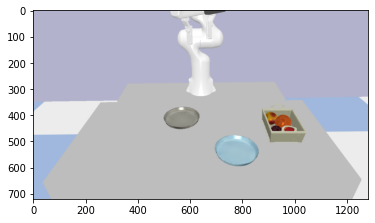

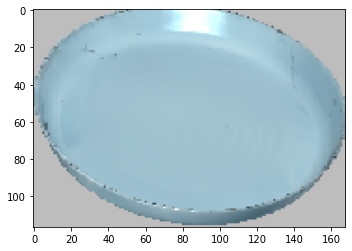

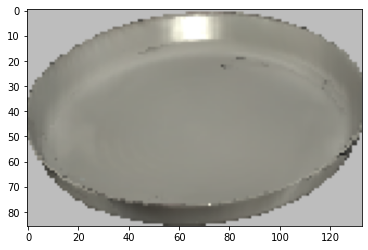

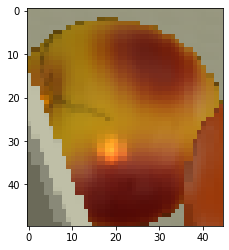

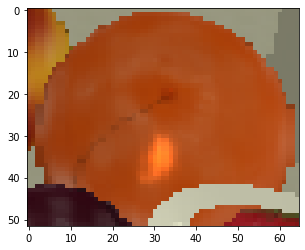

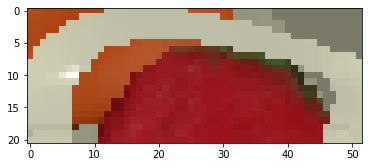

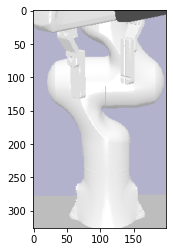

In [90]:
# For all of the generated objects, draw bounding box using the coordinates around the image
sample_bb = first_objects[6]
import cv2
cv_image = cv2.imread(img)
import matplotlib.pyplot as plt
rgb_converted = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rgb_converted)

# draw the bounding box around the image 
print(rgb_converted.shape)
print(sample_bb)
# cropped_img = rgb_converted[int(sample_bb[0]):int(sample_bb[1]),int(sample_bb[2]):int(sample_bb[3]),:]
cropped_img = rgb_converted[int(sample_bb[1]):int(sample_bb[3]), int(sample_bb[0]):int(sample_bb[2])]
# cropped_image = rgb_converted[sample_bb[0]:sample_bb[1], sample]
# plt.figure()
# plt.imshow(cropped_img)

# generate the image crops for all the generated objects 
for sample_bb in updated_bbs:
    cropped_image = rgb_converted[int(sample_bb[1]):int(sample_bb[3]), int(sample_bb[0]):int(sample_bb[2])]
    plt.figure()
    plt.imshow(cropped_image)
    
# multiple bounding boxes with score greater than the threshold were generated, but the bbs are for the same objects as well 
# remove bounding boxes of repeating objects and take the one with the highest accuracy

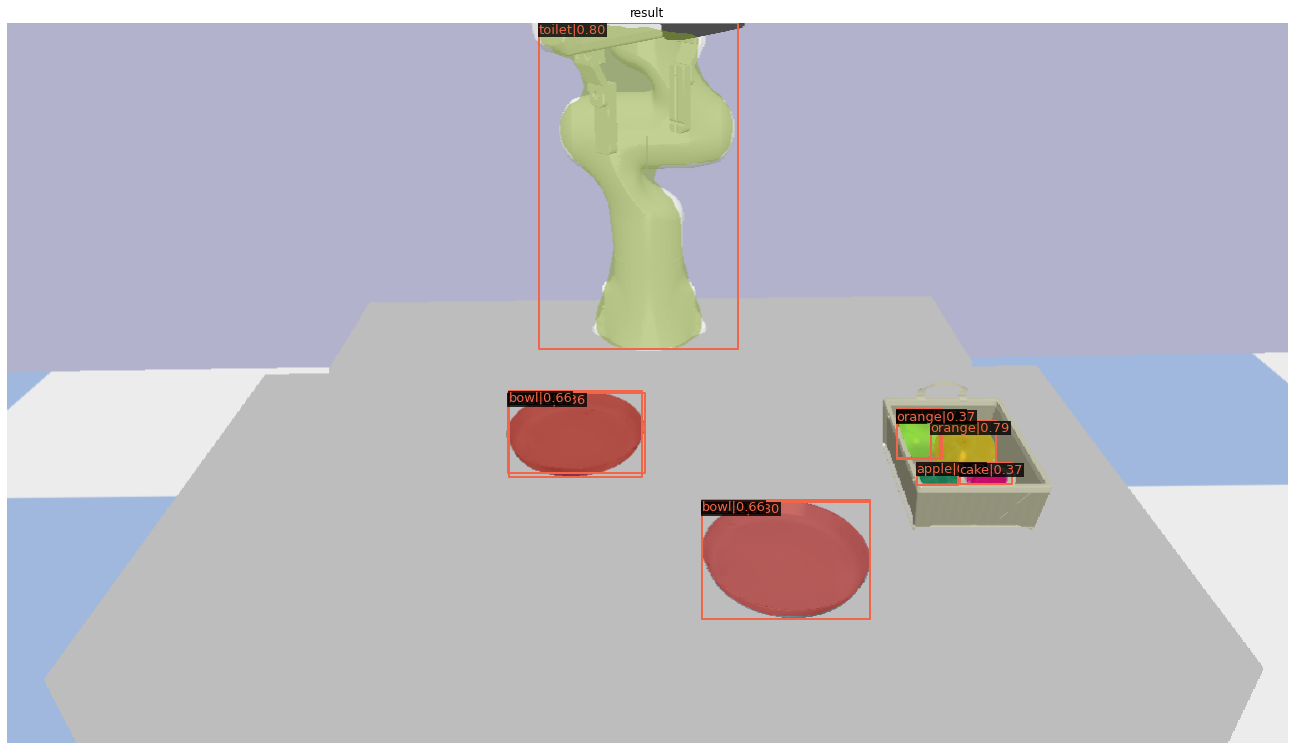

In [9]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)